In [195]:
%matplotlib notebook
import pandas as pd
import os
from datetime import datetime

## Defining spark-rats exported info

In [196]:
export_path = "../export"
df_files = ["border_info.parquet","infecteds_history.parquet","infected_tiles.parquet"]

dates = os.listdir(export_path)
dates

['2020-07-27 08:40',
 '2020-07-27 09:05',
 '2020-07-27 06:38',
 '2020-07-27 07:40',
 '2020-07-27 08:35',
 '2020-07-27 07:53',
 '2020-07-27 09:22',
 '2020-07-27 09:11',
 '2020-07-27 07:33',
 '2020-07-27 08:20',
 '2020-07-27 06:48',
 '2020-07-27 08:48',
 '2020-07-27 09:17',
 '2020-07-27 08:49',
 '2020-07-27 06:57',
 '2020-07-27 09:24',
 '2020-07-27 06:47',
 '2020-07-27 08:12',
 '2020-07-27 07:25',
 '2020-07-27 06:56',
 '2020-07-27 07:52',
 '2020-07-27 07:18',
 '2020-07-27 07:36',
 '2020-07-27 07:59',
 '2020-07-27 09:00',
 '2020-07-27 07:41',
 '2020-07-27 08:24',
 '2020-07-27 08:01',
 '2020-07-27 07:19',
 '2020-07-27 08:11',
 '2020-07-27 09:32',
 '2020-07-27 07:39',
 '2020-07-27 08:43',
 '2020-07-27 06:28',
 '2020-07-27 06:30',
 '2020-07-27 07:37',
 '2020-07-27 07:45',
 '2020-07-27 08:56',
 '2020-07-27 08:06',
 '2020-07-27 08:02',
 '2020-07-27 07:00',
 '2020-07-27 06:44',
 '2020-07-27 07:54',
 '2020-07-27 08:18',
 '2020-07-27 06:58',
 '2020-07-27 06:45',
 '2020-07-27 09:26',
 '2020-07-27 

## Reading spark-rats data

In [197]:
date_file_format = '%Y-%m-%d %H:%M'

def df_info_to_dict(df):
    return df.T.to_dict()[0]

def read_stat_df(parquet_stat, date_dir, export_dir="../export"):
    parquet_dir = f"{export_dir}/{date_dir}/{parquet_stat}"
    
    # We need spark repartition to just one file on save stats data
    parquet_files = [f for f in os.listdir(parquet_dir) if f.endswith(".parquet")]
    df = pd.read_parquet(f"{parquet_dir}/{parquet_files[0]}")
    df['creation_date'] = datetime.strptime(d, date_file_format)
    
    # cast single row info dataframes to dict
    if len(df) == 1:
        df = df_info_to_dict(df)
    return df

In [198]:
simulations = {}
for d in dates:
    simulation_date = datetime.strptime(d, date_file_format)
    simulations[d] = {"date":simulation_date}
    for dff in df_files:
        simulations[d][dff] = read_stat_df(dff, d)

In [199]:
sims_dates = list(simulations.keys())
print("sim_dates:")
print(sims_dates)
print("\n")
print("df_files:")
print(df_files)

sim_dates:
['2020-07-27 08:40', '2020-07-27 09:05', '2020-07-27 06:38', '2020-07-27 07:40', '2020-07-27 08:35', '2020-07-27 07:53', '2020-07-27 09:22', '2020-07-27 09:11', '2020-07-27 07:33', '2020-07-27 08:20', '2020-07-27 06:48', '2020-07-27 08:48', '2020-07-27 09:17', '2020-07-27 08:49', '2020-07-27 06:57', '2020-07-27 09:24', '2020-07-27 06:47', '2020-07-27 08:12', '2020-07-27 07:25', '2020-07-27 06:56', '2020-07-27 07:52', '2020-07-27 07:18', '2020-07-27 07:36', '2020-07-27 07:59', '2020-07-27 09:00', '2020-07-27 07:41', '2020-07-27 08:24', '2020-07-27 08:01', '2020-07-27 07:19', '2020-07-27 08:11', '2020-07-27 09:32', '2020-07-27 07:39', '2020-07-27 08:43', '2020-07-27 06:28', '2020-07-27 06:30', '2020-07-27 07:37', '2020-07-27 07:45', '2020-07-27 08:56', '2020-07-27 08:06', '2020-07-27 08:02', '2020-07-27 07:00', '2020-07-27 06:44', '2020-07-27 07:54', '2020-07-27 08:18', '2020-07-27 06:58', '2020-07-27 06:45', '2020-07-27 09:26', '2020-07-27 08:10', '2020-07-27 08:58', '2020-07

In [200]:
simulations[sims_dates[3]]["border_info.parquet"]

{'min_latitude': 9.999085998726127,
 'max_latitude': 10.00091410005482,
 'min_longitude': 9.99909912638977,
 'max_longitude': 10.000900586728388,
 'min_tile_x': 0,
 'max_tile_x': 203,
 'min_tile_y': 0,
 'max_tile_y': 200,
 'total': 100000,
 'creation_date': Timestamp('2020-07-27 07:40:00')}

In [201]:
def max_sims_date():
    df = pd.DataFrame(sims_dates,columns=['simdate'])
    df['simdate_in_date'] = pd.to_datetime(df['simdate'], format=date_file_format)
    df = df.sort_values(by='simdate_in_date',ascending=False).reset_index()
    return list(df.simdate.values)[0]
last_simulation = simulations[max_sims_date()]

## Printing infected tiles

In [202]:
df = last_simulation["infected_tiles.parquet"]
df.head(3)

tile_x  tile_y  infected       creation_date
0      89     100         1 2020-07-27 09:32:00
1     140     115         1 2020-07-27 09:32:00
2      75     107         1 2020-07-27 09:32:00

<IPython.core.display.Javascript object>


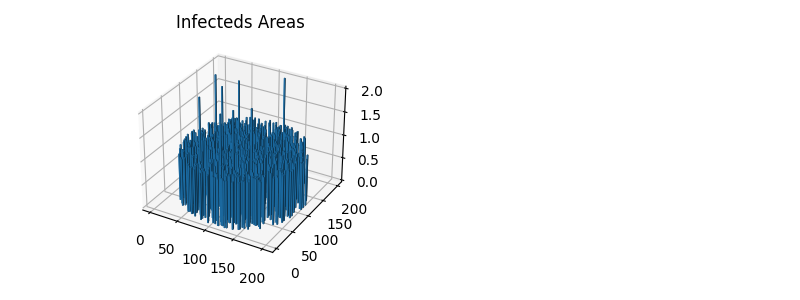

Text(0.5, 0.92, 'Infecteds Areas')

In [203]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')

x,y = df.tile_x, df.tile_y
top = df.infected
bottom = np.zeros_like(top)
width = depth = 2

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Infecteds Areas')

## Infected Tiles - evolution 

In [208]:
frames = []
for s in sims_dates:
    infected_tiles = simulations[s]["infected_tiles.parquet"]
    infected_tiles['creation_str'] = s
    frames.append(infected_tiles)
all_infected_tiles = pd.concat(frames).sort_values("creation_date",ascending=True).reset_index(drop=True)

In [209]:
all_infected_tiles.head(3)

tile_x  tile_y  infected       creation_date      creation_str
0      11     124         1 2020-07-27 06:27:00  2020-07-27 06:27
1     125     188         1 2020-07-27 06:27:00  2020-07-27 06:27
2      78       0         1 2020-07-27 06:27:00  2020-07-27 06:27

In [210]:
all_infected_tiles[np.logical_and(all_infected_tiles.tile_x==83,all_infected_tiles.tile_y==32)]

tile_x  tile_y  infected       creation_date      creation_str
1281       83      32         1 2020-07-27 06:40:00  2020-07-27 06:40
8919       83      32         1 2020-07-27 07:31:00  2020-07-27 07:31
15083      83      32         1 2020-07-27 07:54:00  2020-07-27 07:54
20828      83      32         1 2020-07-27 08:12:00  2020-07-27 08:12
52602      83      32         1 2020-07-27 09:23:00  2020-07-27 09:23

In [211]:
import plotly.express as px

all_infected_tiles['infected_px'] = all_infected_tiles.infected*1

px.scatter(all_infected_tiles, x="tile_x", y="tile_y", animation_frame="creation_str",
           size="infected_px", hover_name="infected",
            size_max=10, range_x=[0,200], range_y=[0,200])

## Infecteds Time evolution - total

In [212]:
infected_history = last_simulation['infecteds_history.parquet']
infected_history['infected_date'] = pd.to_datetime(infected_history['dateRep'], format=date_file_format)
infected_history = infected_history.sort_values(by='infected_date',ascending=True).reset_index()
infected_history

index           dateRep  qty_infected       creation_date  \
0       82  2020-07-26 06:27           100 2020-07-27 09:32:00   
1       78  2020-07-27 06:27             5 2020-07-27 09:32:00   
2       36  2020-07-27 06:28             2 2020-07-27 09:32:00   
3      124  2020-07-27 06:30             2 2020-07-27 09:32:00   
4       89  2020-07-27 06:31             6 2020-07-27 09:32:00   
..     ...               ...           ...                 ...   
134     67  2020-07-27 09:27             4 2020-07-27 09:32:00   
135     23  2020-07-27 09:28             6 2020-07-27 09:32:00   
136      9  2020-07-27 09:30             2 2020-07-27 09:32:00   
137     65  2020-07-27 09:31             2 2020-07-27 09:32:00   
138    128  2020-07-27 09:32             4 2020-07-27 09:32:00   

          infected_date  
0   2020-07-26 06:27:00  
1   2020-07-27 06:27:00  
2   2020-07-27 06:28:00  
3   2020-07-27 06:30:00  
4   2020-07-27 06:31:00  
..                  ...  
134 2020-07-27 09:27:00  
135 2020-07-27 09:28:00  
136 2020-07-27 09:30:00  
137 2020-07-27 09:31:00  
138 2020-07-27 09:32:00  

[139 rows x 5 columns]

<IPython.core.display.Javascript object>


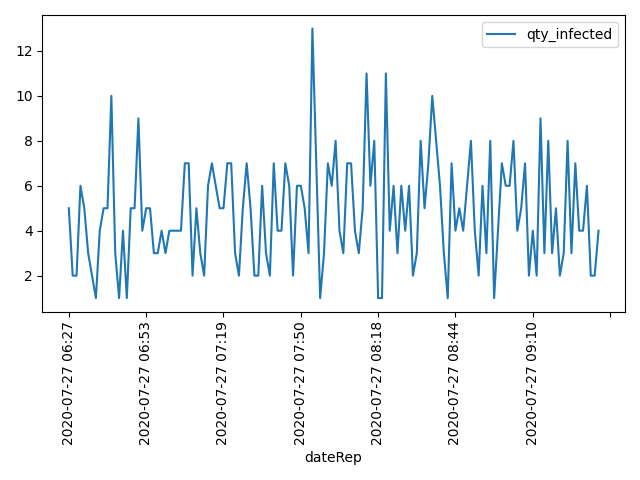

/home/chanchus/developments/sparkRats/analytics/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [213]:
import matplotlib.pyplot as plt

infected_history.drop(0).plot.line(x='dateRep',y='qty_infected',rot=90)
plt.tight_layout()